In [5]:
!pip install plotly
!pip install pandas
!pip install folium
!pip install cufflinks
!pip install matplotlib

     |████████████████████████████████| 11.6 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 2.7 MB/s eta 0:00:01


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly 
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


import folium 

In [8]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
!pip install xlrd

     |████████████████████████████████| 103 kB 1.2 MB/s eta 0:00:01


In [13]:
df = pd.read_excel(r"CovidcasesinIndia.xlsx")

In [15]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [16]:
df.drop (['S. No.'], axis=1, inplace = True)

In [17]:
df.describe(include='all')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
count,26,26.000000,26.000000,26.000000,26.000000
unique,26,NaN,NaN,NaN,NaN
top,Ladakh,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,26.423077,1.615385,2.461538,0.653846
std,NaN,35.586709,3.589729,4.420233,1.017539
min,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,6.000000,0.000000,0.000000,0.000000
50%,NaN,14.500000,0.000000,0.000000,0.000000
75%,NaN,33.500000,1.000000,2.500000,1.000000


In [18]:
df['Total Cases']= df['Total Confirmed cases ( Foreign National )'] + df['Total Confirmed cases (Indian National)']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [21]:
print('Total overall cases in india :',df['Total Cases'].sum())

Total overall cases in india : 729


In [22]:
df['Active Cases']=df['Total Cases']-(df['Death'] + df['Cured'])

In [23]:
df.style.background_gradient(cmap= "Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [30]:
total_active_cases= df.groupby('Name of State / UT')['Active Cases'].sum()
total_active_cases.sort_values(ascending=False).to_frame().style.background_gradient(cmap="Reds")

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [55]:
#df.plot(kind='scatter', x='Name of State / UT', y='Total Cases')
#plt.scatter(df['Name of State / UT'], df['Total Cases'])
df.iplot(kind='scatter', x='Name of State / UT', y='Total Cases', mode='markers+lines', title = 'Covid state count', xTitle='Name of state / UT', yTitle='Count', colors='red',size=20 )
#px.scatter(df ,x='Name of State / UT', y='Total Cases')

In [86]:
#df.plot(kind='bar', x='Name of State / UT', y='Total Cases')
#plt.bar(df['Name of State / UT'], df['Total Cases'])
#px.bar(df,x='Name of State / UT', y='Total Cases')
#df.iplot(kind='bar', x='Name of State / UT', y='Total Cases')
"""
fig= plt.figure(dpi=100)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'], df['Total Cases'],)
axes.set_title("Total Cases in India")
axes.set_xlabel('Name of state / UT')
axes.set_ylabel('Total Cases')
plt.show()
"""
fig= go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'], y= df['Total Cases']))
fig.update_layout(title='Total cases in india', xaxis=dict(title='Name of state / UT'), yaxis=dict(title='Total Cases'))

In [69]:
indian_cord = pd.read_excel('Indian Coordinates.xlsx')
indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [70]:
df_full=pd.merge(indian_cord, df, on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [80]:
map =folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long], radius=value*0.8, popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' +str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [112]:
map

In [85]:
dbd_India=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [99]:
"""fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India['Date'],dbd_India['Total Cases'], color='blue')
axes.set_xlabel=('Date')
axes.set_ylabel=('Total Cases')
axes.set_title('Confirmed Cases in India')
"""
fig=px.bar(dbd_India, dbd_India['Date'],dbd_India['Total Cases'], color=dbd_India['Total Cases'], title='Confirmed cases in India')
fig.show()

In [98]:
fig=px.bar(dbd_Italy, dbd_Italy['Date'],dbd_Italy['Total Cases'], color=dbd_Italy['Total Cases'], title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea, dbd_Korea['Date'],dbd_Korea['Total Cases'], color=dbd_Korea['Total Cases'], title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan, dbd_Wuhan['Date'],dbd_Wuhan['Total Cases'], color=dbd_Wuhan['Total Cases'], title='Confirmed cases in Wuhan')
fig.show()

In [111]:
#fig=px.scatter(dbd_India, dbd_India['Date'],dbd_India['Total Cases'], color=dbd_India['Total Cases'], title='Confirmed cases in india')
#fig.show()

dbd_India.iplot(kind='scatter', x='Date', y='Total Cases', mode='lines+markers')

In [116]:
from plotly.subplots import make_subplots

fig=make_subplots(rows=2, cols=2, specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
                 subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
             marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
             marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
             marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
             marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale="Bluered_r"), showlegend=False, title_text="Total Cases in 4 countries")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [119]:
df=pd.read_csv("covid_19_data.csv",parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [122]:
#df.query('Country=="India"')
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [125]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [129]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers',name='Confirmed', line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['Date'], y=death['Deaths'], mode='lines+markers',name='Deaths', line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'], y=rec['Recovered'], mode='lines+markers',name='Recovered', line=dict(color='yellow',width=2)))


In [131]:
df_conf= pd.read_csv(r'time_series_covid_19_confirmed.csv')
df_conf.rename(columns={"Country/Region":"Country"}, inplace=True)

In [132]:
df_latlong=pd.merge(df,df_conf, on=['Country','Province/State'])

In [133]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [136]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",
                      color_continuous_scale="Portland",radius=7,zoom=0,height=700)

fig.update_layout(title="Worldwide COVID cases")
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [139]:
from fbprophet import Prophet

In [140]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [141]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [142]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,148703.893314,132539.434461,165191.290433
57,2020-03-19,152585.478705,138141.853834,167629.988512
58,2020-03-20,157365.812683,142681.451270,172745.918477
59,2020-03-21,161049.269159,145199.506294,176543.030034
60,2020-03-22,165066.852886,149845.374309,179681.569402


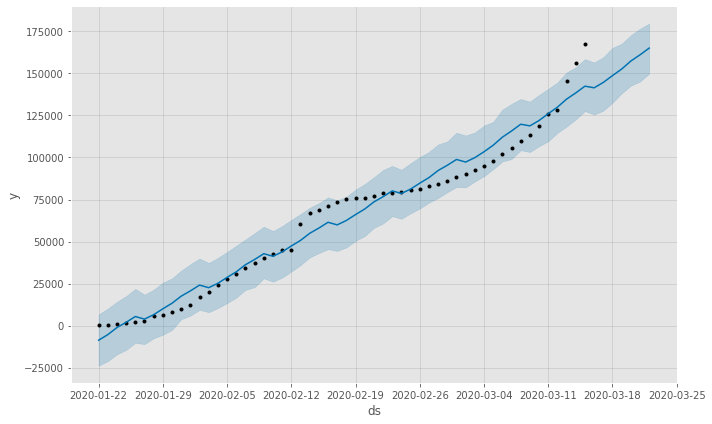

In [145]:
confirmed_forecast_plot = m.plot(forecast)

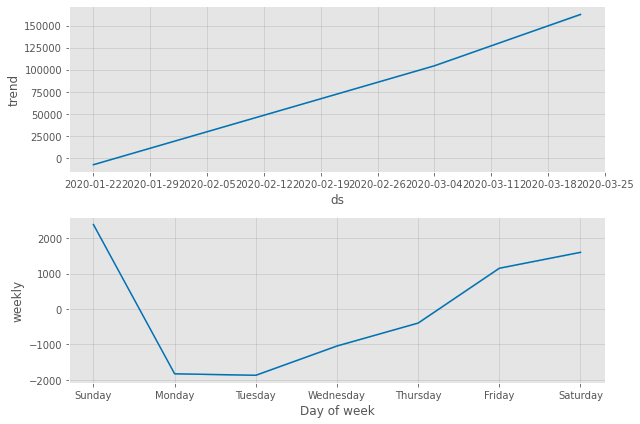

In [146]:
confirmed_forecast_plot =m.plot_components(forecast)

In [149]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [150]:
m = Prophet(interval_width=0.95)
m.fit(death)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [151]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,6138.426075,5746.021738,6498.273369
57,2020-03-19,6317.279963,5909.267587,6709.009693
58,2020-03-20,6547.994984,6095.698944,6952.613437
59,2020-03-21,6770.710026,6347.792363,7210.833138
60,2020-03-22,7011.342322,6594.247938,7419.728201


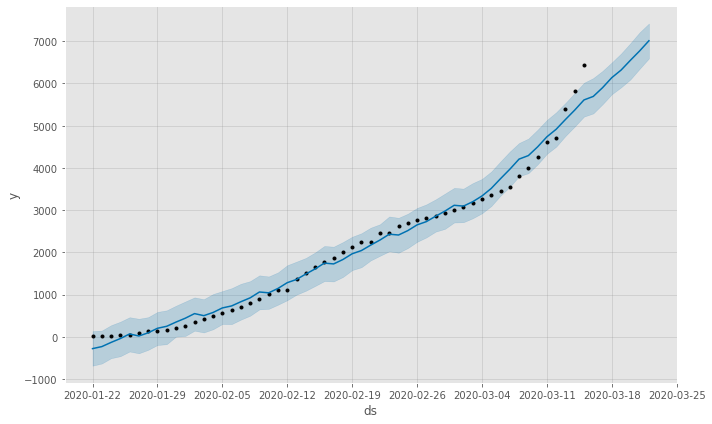

In [152]:
deaths_forecast_plot = m.plot(forecast)

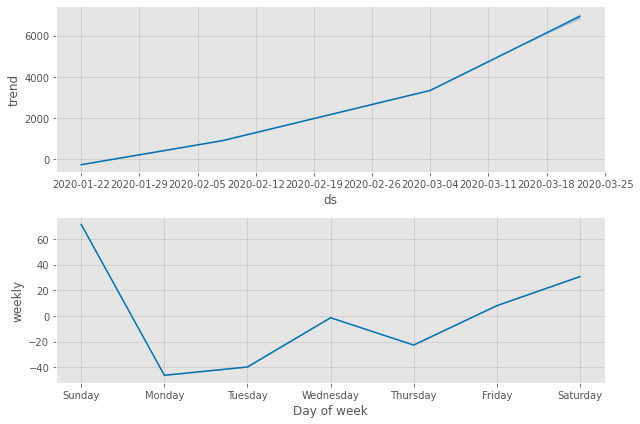

In [153]:
deaths_forecast_plot = m.plot_components(forecast)